In [193]:
import geopandas as gpd
from shapely import LineString, Point
import matplotlib.pyplot as plt

# Dataset

In [169]:
edges = gpd.read_file('map-edges.gpkg')
nodes = gpd.read_file('map-nodes.gpkg')
truth = gpd.read_file('ground-truths.gpkg')
rawtr = gpd.read_file('raw-trajectory.gpkg')
synth = gpd.read_file('synthetic-data.gpkg')

In [170]:
nodes

,osmid,y,x,compressed_id,geometry
0,366372433,1.215633e+06,650430.259238,0,POINT (650430.259 1215633.107)
1,7251842686,1.215617e+06,650570.942426,1,POINT (650570.942 1215616.697)
2,7251774053,1.215637e+06,650325.182449,2,POINT (650325.182 1215636.828)
3,7258455914,1.215454e+06,650488.453585,3,POINT (650488.454 1215453.512)
4,366389789,1.215531e+06,651137.190174,4,POINT (651137.19 1215530.994)
...,...,...,...,...,...
146257,10991860089,1.149122e+06,708911.779484,146257,POINT (708911.779 1149122.168)
146258,12712705291,1.149992e+06,709157.651409,146258,POINT (709157.651 1149991.723)
146259,13266256212,1.148725e+06,709873.399449,146259,POINT (709873.399 1148724.597)
146260,13266256218,1.148763e+06,709716.362626,146260,POINT (709716.363 1148762.646)


In [171]:
edges

,index,u_compressed,v_compressed,oneway,maxspeed,geometry
0,0,0,1,False,40.0,"LINESTRING (650430.259 1215633.107, 650533.595..."
1,1,0,2,False,40.0,"LINESTRING (650430.259 1215633.107, 650334.831..."
2,2,0,3,False,40.0,"LINESTRING (650430.259 1215633.107, 650438.417..."
3,3,1,34,False,40.0,"LINESTRING (650570.942 1215616.697, 650583.625..."
4,4,1,0,False,40.0,"LINESTRING (650570.942 1215616.697, 650533.595..."
...,...,...,...,...,...,...
341358,341358,146259,145720,False,40.0,"LINESTRING (709873.399 1148724.597, 709898.407..."
341359,341359,146260,146146,False,40.0,"LINESTRING (709716.363 1148762.646, 709774.009..."
341360,341360,146260,146261,False,40.0,"LINESTRING (709716.363 1148762.646, 709710.415..."
341361,341361,146260,146145,False,40.0,"LINESTRING (709716.363 1148762.646, 709720.959..."


In [172]:
truth

,geometry
0,"LINESTRING (696973.748 1202610.539, 696973.845..."
1,"LINESTRING (676965.889 1187775.109, 676947.422..."
2,"LINESTRING (681130.99 1187005.378, 681130.99 1..."
3,"LINESTRING (681959.842 1145649.393, 681950.127..."
4,"LINESTRING (687090.367 1196018.811, 687090.367..."
...,...
179,"LINESTRING (652245.18 1205381.046, 652245.142 ..."
180,"LINESTRING (680705.695 1188961.84, 680706.639 ..."
181,"LINESTRING (643161.146 1205084.212, 643161.146..."
182,"LINESTRING (680705.695 1188961.84, 680706.639 ..."


In [173]:
rawtr

,geometry
0,"LINESTRING (681310.99 1189335.165, 681341.835 ..."
1,"LINESTRING (697720.498 1202696.454, 697609.836..."
2,"LINESTRING (682014.297 1175052.958, 680854.261..."
3,"LINESTRING (678289.718 1167527.609, 678329.594..."
4,"LINESTRING (685480.307 1195913.467, 685347.838..."
...,...
179,"LINESTRING (670223.968 1201913.567, 671598.75 ..."
180,"LINESTRING (663713.052 1194090.418, 663557.323..."
181,"LINESTRING (652473.367 1204032.101, 652540.271..."
182,"LINESTRING (669992.523 1178414.386, 669584.733..."


In [202]:
sindex = edges.sindex
rawList = [sindex.nearest(Point(point))[1][0] for point in truth.iloc[10].geometry.coords]

In [203]:
from itertools import groupby

finalList = [k for k, g in groupby(rawList)]
finalList

[np.int64(167582),
 np.int64(167588),
 np.int64(167474),
 np.int64(167478),
 np.int64(74765),
 np.int64(99437),
 np.int64(167606),
 np.int64(167601),
 np.int64(167607),
 np.int64(167609),
 np.int64(270229),
 np.int64(167668),
 np.int64(167957),
 np.int64(167600),
 np.int64(99439),
 np.int64(125081),
 np.int64(168037),
 np.int64(233351),
 np.int64(185866),
 np.int64(167625),
 np.int64(74276),
 np.int64(74278),
 np.int64(184322),
 np.int64(72886),
 np.int64(74832),
 np.int64(72822),
 np.int64(74834),
 np.int64(118477),
 np.int64(74030),
 np.int64(74080),
 np.int64(74083),
 np.int64(72876),
 np.int64(73567),
 np.int64(72800),
 np.int64(73567),
 np.int64(73840),
 np.int64(73568),
 np.int64(73790),
 np.int64(73787),
 np.int64(73789),
 np.int64(230299),
 np.int64(230300),
 np.int64(230301),
 np.int64(74191),
 np.int64(74195),
 np.int64(72670),
 np.int64(72675),
 np.int64(73455),
 np.int64(104757),
 np.int64(177606),
 np.int64(50532),
 np.int64(124590),
 np.int64(167869),
 np.int64(137116),
 

In [214]:
def getPoint (gdf, ID):
    line = gdf.iloc[ID].geometry
    return list(line.xy[0]), list(line.xy[1])

def visualize (edges, rawTrajectory, groundTruth, syntheticData, ID = 0):
    rawGPS, trueGPS, synthGPS = rawTrajectory.iloc[[ID]], groundTruth.iloc[[ID]].geometry, syntheticData.iloc[[ID]].geometry

    fig, ax = plt.subplots(1, 1, figsize=(20, 24))
    edges.plot(ax = ax, color = 'lightgray', linewidth = 1, label = 'Road edges', zorder = 1)
    # trueGPS.plot(ax = ax, color = 'green', linewidth = 2, label = 'True GPS (provided data)', zorder = 2)
    # rawGPS.plot(ax = ax, color = 'blue', linewidth = 2, label = 'Raw GPS (provided data)', zorder = 4)
    # synthGPS.plot(ax = ax, color = 'orange', linewidth = 2, label = 'Synthetic Data', zorder = 6)

    highlight = edges[edges['index'].isin(finalList)]
    highlight.plot(ax = ax, color = 'black', zorder = 9)

    # p = Point(684144.4266256411, 1191294.9221409215)
    # point_gdf = gpd.GeoDataFrame(geometry=[p], crs=edges.crs)
    # point_gdf.plot(ax=ax, color='red', marker='o', markersize=50, zorder=10, label='Target Point')

    x, y = getPoint(groundTruth, ID)
    ax.plot(x, y, color = 'blue', marker = 'o', markersize = 4, zorder = 3)
    x, y = getPoint(rawTrajectory, ID)
    # ax.plot(x, y, color = 'darkblue', marker = 'o', markersize = 4, zorder = 5)
    x, y = getPoint(syntheticData, ID)
    # ax.plot(x, y, color = 'darkorange', marker = 'o', markersize = 4, zorder = 7)

    minx, miny, maxx, maxy = trueGPS.total_bounds

    buffer = 200
    ax.set_xlim(minx - buffer, maxx + buffer)
    ax.set_ylim(miny - buffer, maxy + buffer)

    ax.set_title('Visualizing Road Network, Raw GPS, True GPS, Synthetic Data')
    ax.legend(loc='lower left')
    plt.show()

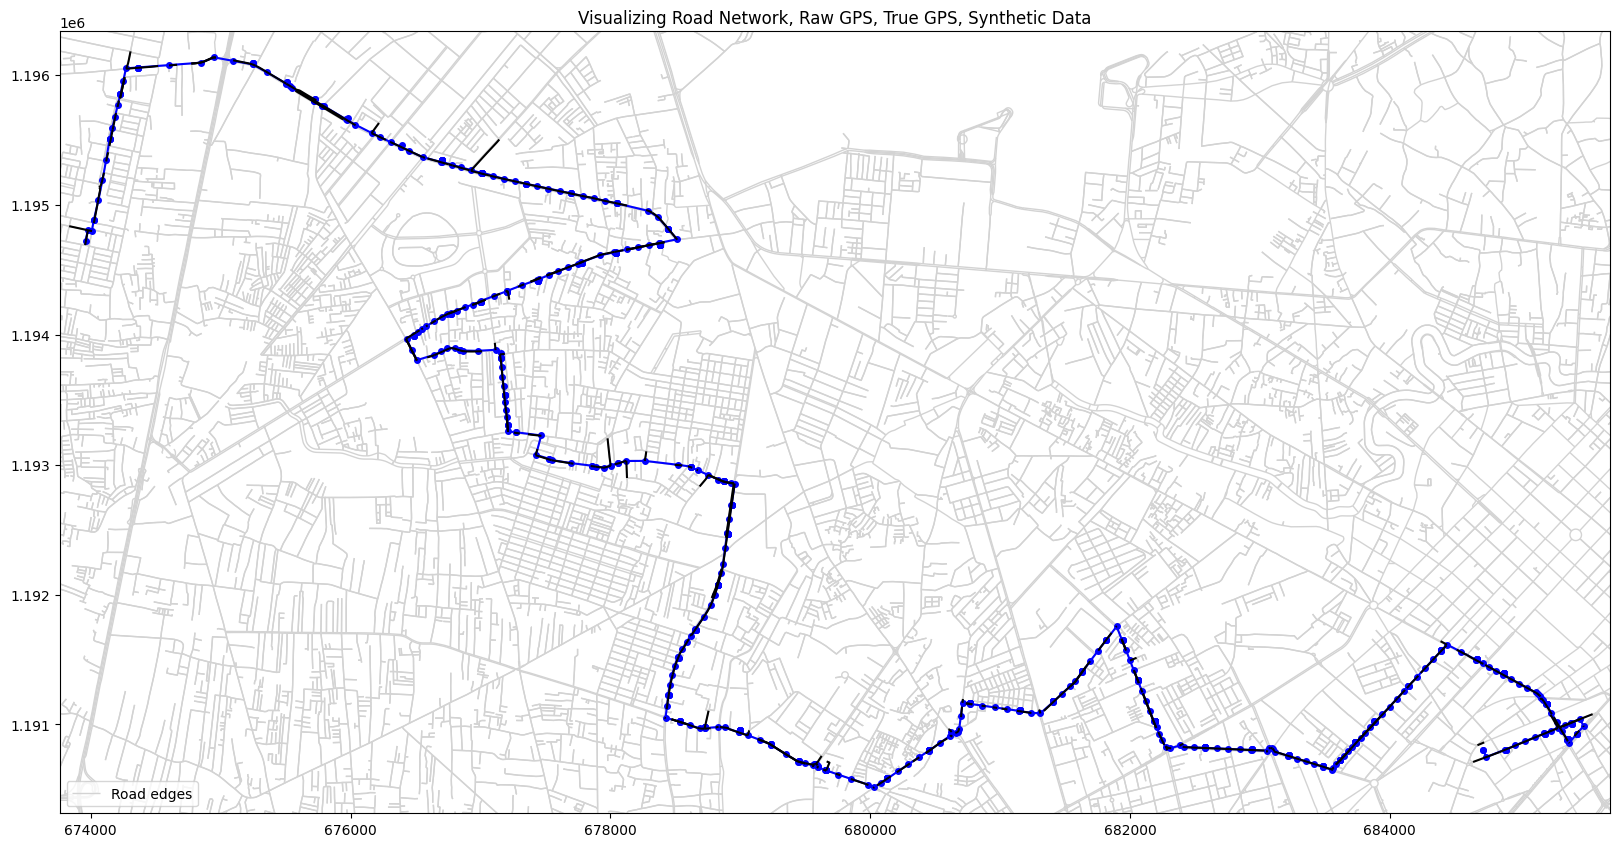

In [215]:
visualize(edges, rawtr, truth, synth, 10)

# Evaluation

In [194]:
point = truth.iloc[10].geometry.coords[100]
point

(684144.4266256411, 1191294.9221409215)

In [191]:
# 1. Get the row number (positional index)
pos_idx = edges.sindex.nearest(point)[1][0] 

# 2. Use .iloc to get the actual label/ID from your 'index' column
actual_id = edges.iloc[pos_idx]['index']

In [200]:
rawList

[np.int64(167582),
 np.int64(167582),
 np.int64(167588),
 np.int64(167474),
 np.int64(167474),
 np.int64(167474),
 np.int64(167474),
 np.int64(167474),
 np.int64(167474),
 np.int64(167478),
 np.int64(167478),
 np.int64(167478),
 np.int64(74765),
 np.int64(74765),
 np.int64(74765),
 np.int64(74765),
 np.int64(74765),
 np.int64(74765),
 np.int64(74765),
 np.int64(99437),
 np.int64(167606),
 np.int64(167606),
 np.int64(167601),
 np.int64(167601),
 np.int64(167601),
 np.int64(167601),
 np.int64(167601),
 np.int64(167607),
 np.int64(167609),
 np.int64(270229),
 np.int64(270229),
 np.int64(270229),
 np.int64(270229),
 np.int64(167668),
 np.int64(167957),
 np.int64(167957),
 np.int64(167957),
 np.int64(167957),
 np.int64(167957),
 np.int64(167957),
 np.int64(167957),
 np.int64(167957),
 np.int64(167957),
 np.int64(167600),
 np.int64(99439),
 np.int64(99439),
 np.int64(99439),
 np.int64(99439),
 np.int64(99439),
 np.int64(99439),
 np.int64(99439),
 np.int64(99439),
 np.int64(99439),
 np.int64(